In [29]:
import nd2reader
import pandas as pd
import string
import numpy as np
from scipy import stats
import os
from multiprocessing import Pool
from os.path import splitext,basename
import cv2

In [23]:
fh_xls='../test/test.xlsx'
data_job=pd.read_excel(fh_xls,'JobView')
nd2_dh="/media/Transcend/20160219_000356_267"
cores=16

In [ ]:
# data_job.head()
# data_job=data_job.loc[:10,:]
data_fns=pd.pivot_table(data_job,values='File Name',index='Loop_bleach Index',columns='Well Name', aggfunc=lambda x: x.iloc[0])

In [ ]:
nd2_fhs=list(data_fns['A01'].dropna())
nd2_fhs=[nd2_dh+'/'+nd2_fh for nd2_fh in nd2_fhs]
nd2_fh=nd2_fhs[0]

In [ ]:
# convert t0 csvs
# def nd2csv(nd_fh):
nd = nd2reader.Nd2(nd2_fh)
# frame_cnt=0
# for frame in nd:
arr=nd[0]
#     np.savetxt("%s/%s%02d.csv" % (nd2_dh,basename(nd_fh),frame_cnt), frame, delimiter=",")
#     frame_cnt+=1
# nd.close

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# fig=plt.imshow(np.array(arr[0]))
plt.imshow(np.array(arr))
plt.savefig('test.png')

In [ ]:
img1 = cv2.imread('test.png')
img2 = cv2.imread('test.png')
img3 = cv2.imread('test.png')

In [ ]:
# ht=nd.height
# wd=nd.width
ht, wd, a=img2.shape
# video = cv2.VideoWriter('video.avi',-1,1,(wd,ht))
# video = cv2.VideoWriter('video.avi',cv2.cv.CV_FOURCC('M','J','P','G'),20,(wd,ht))
# video = cv2.VideoWriter('video.avi',cv2.cv.CV_FOURCC('D', 'I', 'V', 'X'),20,(wd,ht))
# video = cv2.VideoWriter('video.avi',cv2.cv.CV_FOURCC('F','M','P', '4'),20,(wd,ht),1)
# video = cv2.VideoWriter('video.avi',cv2.cv.CV_FOURCC('I','Y','U', 'V'),20,(wd,ht),1)
video = cv2.VideoWriter('test1.avi',cv2.cv.CV_FOURCC('M','J','P','G'), 25,(wd,ht), False)

video.write(img1)
video.write(img2)
video.write(img3)

video.release()
# cv2.destroyAllWindows()

In [ ]:
img2.shape

In [ ]:
ht, wd, a=img2.shape

In [30]:
fh_xls='../../../data/yeast_gfp_half_life/data/160305_bleachto60ormore/160305_bleach10minB06.xlsx'
data_job=pd.read_excel(fh_xls,'JobView')

In [68]:
nd_dh='../../../data/yeast_gfp_half_life/data/160305_bleachto60ormore/160305_bleachchase_bleach10min/20160305_234331_875'
nd_fns=['WellB06_Seq0000.nd2',\
        'WellB06_Seq0002.nd2',\
        'WellB06_Seq0007.nd2']
arr_list=[]
for nd_fn in nd_fns:
    nd = nd2reader.Nd2("%s/%s" % (nd_dh,nd_fn))
    for ndi in nd:
        arr_list.append(np.array(ndi))
    del nd

In [69]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
%matplotlib inline


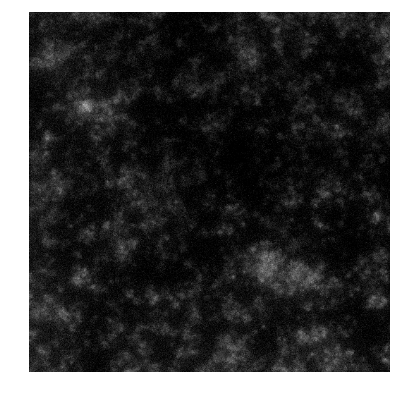

In [70]:
dpi = 100
xpixels, ypixels = 512, 512
fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
ax = plt.Axes(fig, [0., 0., 1, 1])
fig.add_axes(ax)
ax.set_axis_off()
ax.set_aspect('equal')
im = ax.imshow(arr_list[0],cmap='gray')
# plt.savefig('test.png')

def update_img(n):
    tmp = arr_list[1:][n]
    im.set_data(tmp)
    return im

# #legend(loc=0)
ani = animation.FuncAnimation(fig,update_img,np.arange(len(arr_list)-1),interval=60,blit=False)
writer = animation.writers['ffmpeg'](fps=1)

ani.save('demo3.mp4',writer=writer)#dpi=dpi


In [55]:
#phase correlate
import cv2
import numpy

In [5]:
def pc(arr_list):
    cx = 0.0
    cy = 0.0
    stb_arr_list=[]
    prev_image = numpy.float32(arr_list[0]) #ref
    for frame in arr_list:
        image = numpy.float32(frame)
        # TODO: set window around phase correlation
        dp = cv2.phaseCorrelate(prev_image, image)
        cx = cx - dp[0]
        cy = cy - dp[1]
        xform = numpy.float32([[1, 0, cx], [0, 1, cy]])
        stable_image = cv2.warpAffine(image, xform, dsize=(image.shape[1], image.shape[0]))
        prev_image = image
        stb_arr_list.append(stable_image)
    return stb_arr_list

In [69]:
stb_arr_list=pc(arr_list)

In [72]:
def arrlist2vid(arrlist,vid_fh):
    dpi = 100
    xpixels, ypixels = 512, 512
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    ax = plt.Axes(fig, [0., 0., 1, 1])
    fig.add_axes(ax)
    ax.set_axis_off()
    ax.set_aspect('equal')
    im = ax.imshow(arr_list[0],cmap='gray')
    # plt.savefig('test.png')

    def update_img(n):
        tmp = arr_list[1:][n]
        im.set_data(tmp)
        return im

    # #legend(loc=0)
    ani = animation.FuncAnimation(fig,update_img,np.arange(len(arr_list)-1),interval=60,blit=False)
    writer = animation.writers['ffmpeg'](fps=1)

    ani.save(vid_fh,writer=writer)#dpi=dpi


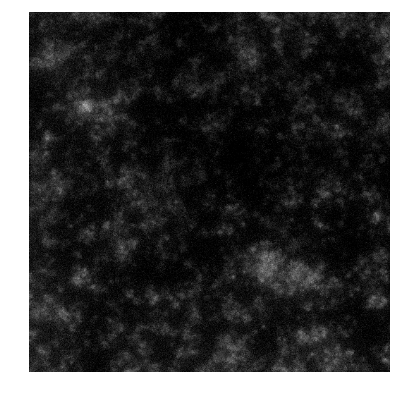

In [73]:
arrlist2vid(stb_arr_list,'demo2_stb.mp4')

In [88]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.segmentation import random_walker
# from skimage.data import binary_blobs
import skimage
from skimage import io
from skimage import exposure
from skimage import restoration
from skimage import filters
from skimage import morphology

/home/kclabws1/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/skimage/filters/rank/generic.py:68: UserWarning: Bitdepth of 12 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


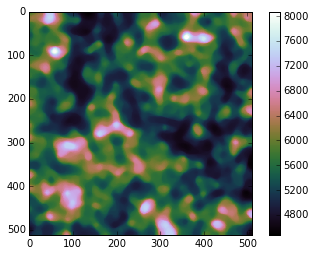

In [107]:
edges = filters.median(data.astype(uint16),np.ones((10,10)))
io.imshow(edges)
io.show()

In [108]:
data=edges
markers = np.zeros(data.shape, dtype=np.uint)
markers[data < filters.threshold_otsu(edges)] = 1
markers[data > filters.threshold_otsu(edges)] = 2

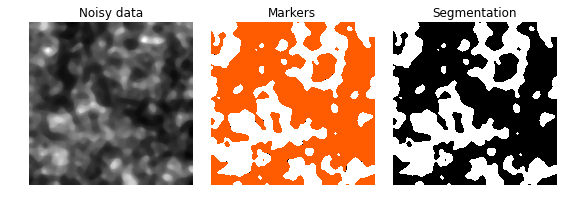

In [127]:
# Generate noisy synthetic data
# data = skimage.img_as_float(binary_blobs(length=128, seed=1))
# data += 0.35 * np.random.randn(*data.shape)

# image = exposure.rescale_intensity(arr_list[0], in_range=(0, 1))

# data=skimage.img_as_float(np.float64(arr_list[0]))

# Run random walker algorithm
labels = random_walker(data, markers, beta=10, mode='bf')

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3.2),
                                    sharex=True, sharey=True)
ax1.imshow(data, cmap='gray', interpolation='nearest')
ax1.axis('off')
ax1.set_adjustable('box-forced')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='hot', interpolation='nearest')
ax2.axis('off')
ax2.set_adjustable('box-forced')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray', interpolation='nearest')
ax3.axis('off')
ax3.set_adjustable('box-forced')
ax3.set_title('Segmentation')

fig.tight_layout()
plt.show()

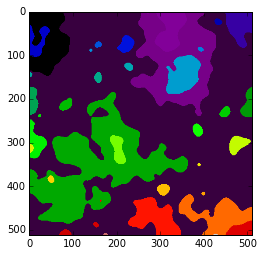

In [110]:
from skimage import measure
lbl=measure.label(labels)
plt.imshow(lbl,cmap="spectral")

In [142]:
props = measure.regionprops(lbl,data)
len(props)

38

In [115]:
medians=np.array([prop.area for prop in props])

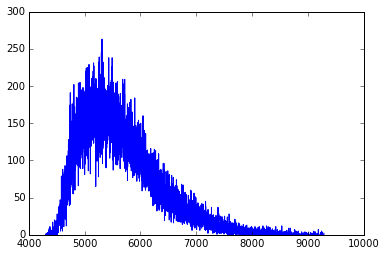

In [85]:
hist=exposure.histogram(edges)
plt.plot(hist[1],hist[0])

In [121]:
for prop in props:
    if prop.mean_intensity> 5400:
        break

In [124]:
prop.coords

array([[  0, 256],
       [  0, 257],
       [  0, 258],
       ..., 
       [239, 389],
       [239, 390],
       [239, 391]])

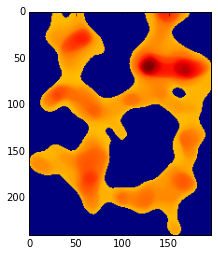

In [123]:
plt.imshow(prop.mean_intensity)

In [128]:
props = measure.regionprops(labels,data)

In [129]:
len(props)

2

In [141]:
props.

38